<a href="https://colab.research.google.com/github/GNirasha/DrawArts/blob/main/my_model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root='/content/drive/MyDrive/1_Research/Dataset/'
train_dir = root+'train/'
val_dir = root+'validate/'
test_dir = root+'test/'

In [ ]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(val_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['gen', 'real']
Valid_dir Subfolders:  ['real', 'gen']
Test_dir Subfolders:  ['real', 'gen']


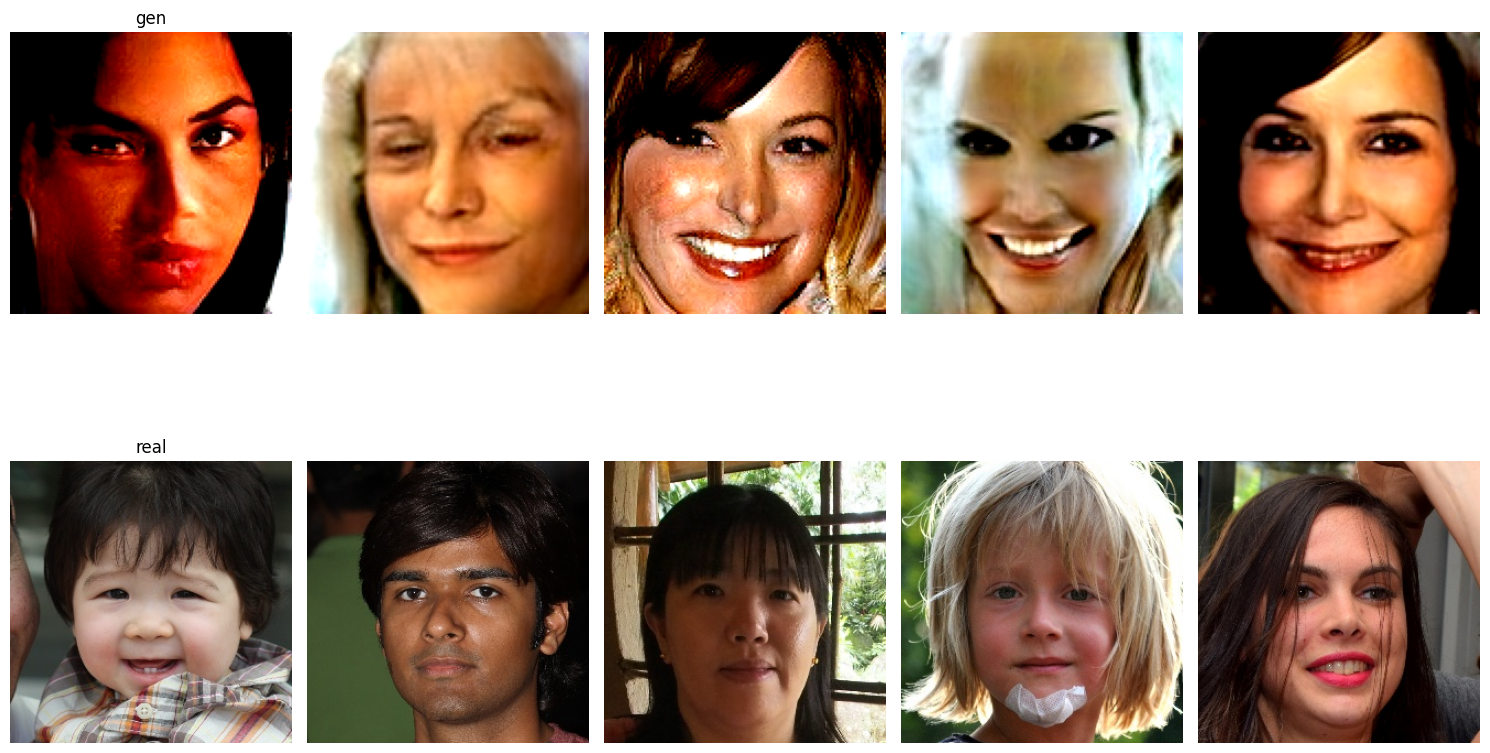

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class_names = ['gen', 'real']
num_images = 5

plt.figure(figsize=(15, 10))

#  training img
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)

    # Plot title
    plt.subplot(len(class_names), num_images, i * num_images + 1)
    plt.title(class_name)
    plt.axis('off')

    # Plot sample images
    for j in range(num_images):
        img_path = os.path.join(class_dir, images[j])
        img = mpimg.imread(img_path)
        plt.subplot(len(class_names), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)
target_size = (224,224)
batch_size = 32

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)


test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 14000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [ ]:
# Verify class distribution
print("Training class distribution:", train_generator.class_indices)
print("Validation class distribution:", val_generator.class_indices)
print("Test class distribution:", test_generator.class_indices)

Training class distribution: {'gen': 0, 'real': 1}
Validation class distribution: {'gen': 0, 'real': 1}
Test class distribution: {'gen': 0, 'real': 1}


In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
# Build model

# Build the CNN model - 1
model = Sequential([

    Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu',kernel_regularizer='l2'),
	  Dropout(0.2),
	  Dense(32, activation='relu',kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

opt=Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 14, 14, 128)         │              

 Total params: 544,289 (2.08 MB)

 Trainable params: 543,649 (2.07 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stopping]
)

test_metrics = model.evaluate(test_generator)
print("Test metrics:", test_metrics[1])

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 11521s 26s/step - accuracy: 0.5486 - loss: 2.2241 - val_accuracy: 0.5042 - val_loss: 1.7230
Epoch 2/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 529s 1s/step - accuracy: 0.6416 - loss: 1.5186 - val_accuracy: 0.7883 - val_loss: 1.0526
Epoch 3/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 530s 1s/step - accuracy: 0.6869 - loss: 1.1046 - val_accuracy: 0.7812 - val_loss: 0.8032
Epoch 4/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 528s 1s/step - accuracy: 0.7173 - loss: 0.8615 - val_accuracy: 0.7770 - val_loss: 0.6650
Epoch 5/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 535s 1s/step - accuracy: 0.7590 - loss: 0.6957 - val_accuracy: 0.8150 - val_loss: 0.5496
Epoch 6/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.7910 - loss: 0.5861 - val_accuracy: 0.8462 - val_loss: 0.4716
Epoch 7/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 538s 1s/step - accuracy: 0.8144 - loss: 0.5126 - val_accuracy: 0.8735 - val_loss: 0.3979
Epoch 8/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 536s 1s/step - accuracy: 0.8405 - loss: 0.4401 - val_accuracy: 0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tensorflow.keras.models import save_model
model.save('my_model_4.h5')
model_path = '/content/drive/MyDrive/1_Research/Models/my_model_4.h5'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
model.save(model_path)

In [ ]:
!ls /content/drive/My\ Drive/1_Research/Models

my_model_4.h5


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model(model_path)


In [ ]:
# Save the history object to a file for future use
import pickle
with open('train_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import pickle

with open('train_history.pkl', 'rb') as file_pi:
    history = pickle.load(file_pi)

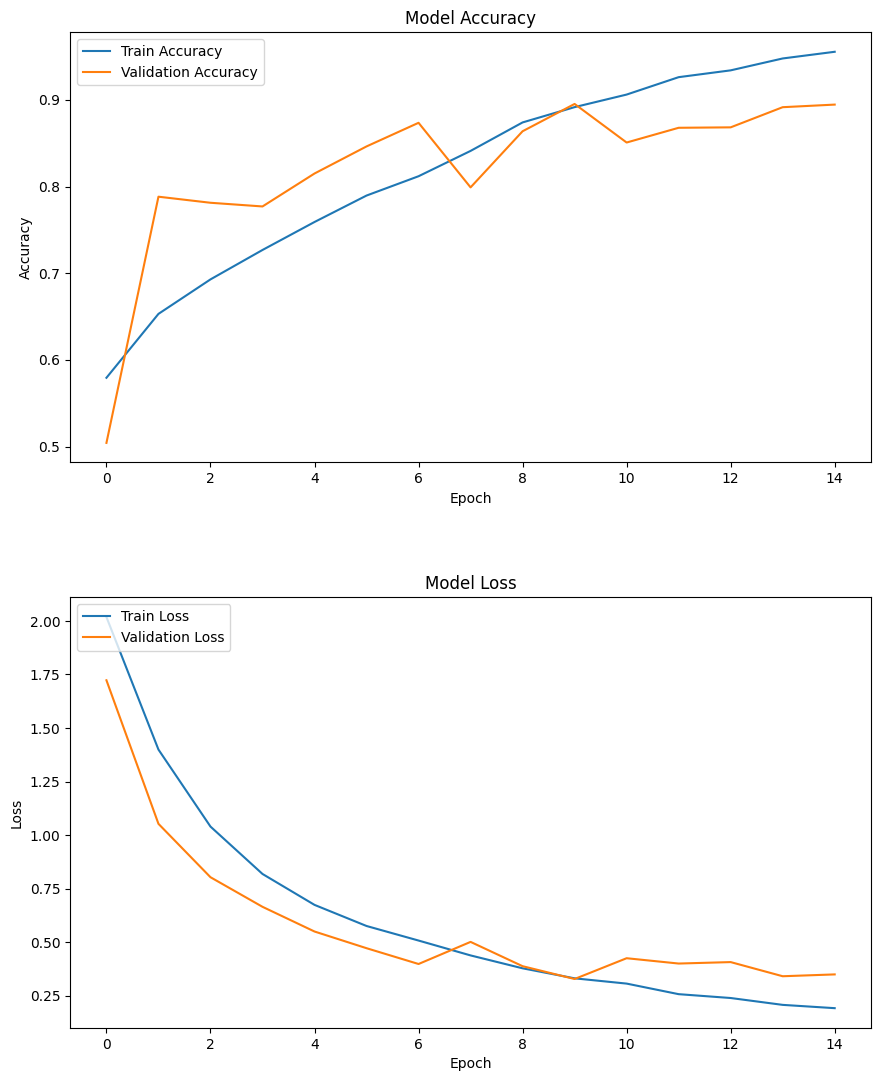

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Load the history object
with open('train_history.pkl', 'rb') as file_pi:
    history = pickle.load(file_pi)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column, larger figure size
# Plot training & validation accuracy values
ax1.plot(history['accuracy'], label='Train Accuracy')
ax1.plot(history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Plot training & validation loss values
ax2.plot(history['loss'], label='Train Loss')
ax2.plot(history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout(pad=5.0)  # Adjust the padding between and around subplots
plt.show()

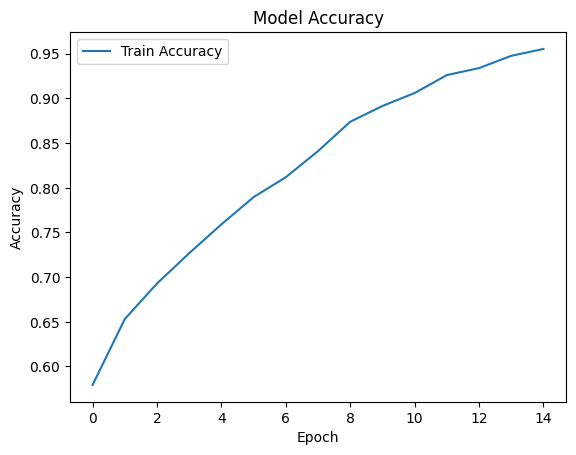

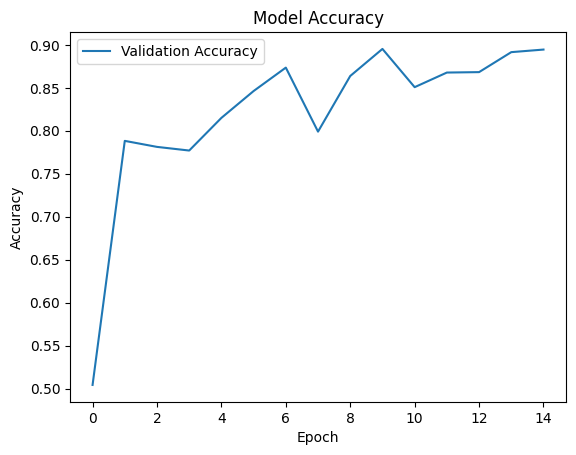

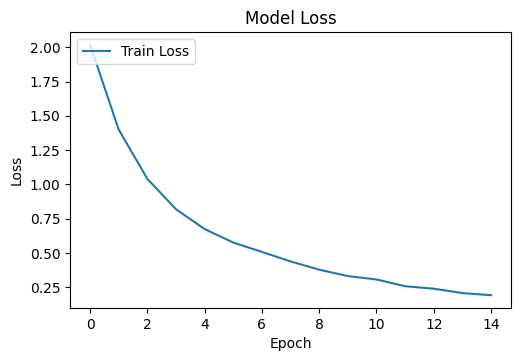

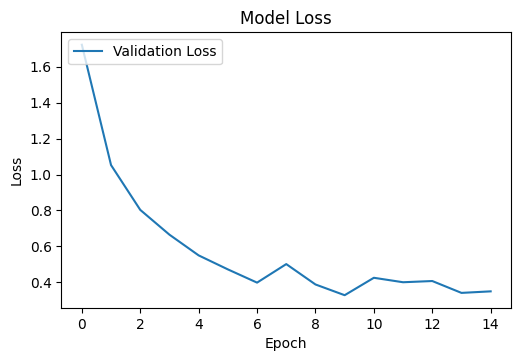

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Load the history object
with open('train_history.pkl', 'rb') as file_pi:
    history = pickle.load(file_pi)

# Plot training & validation accuracy values
plt.plot(history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
plt.tight_layout(pad=5.0)

plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
plt.tight_layout(pad=5.0)

# Plot training & validation loss values
plt.plot(history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.tight_layout(pad=5.0)  # Adjust the padding between and around subplots
plt.show()

plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.tight_layout(pad=5.0)  # Adjust the padding between and around subplots
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 257ms/step


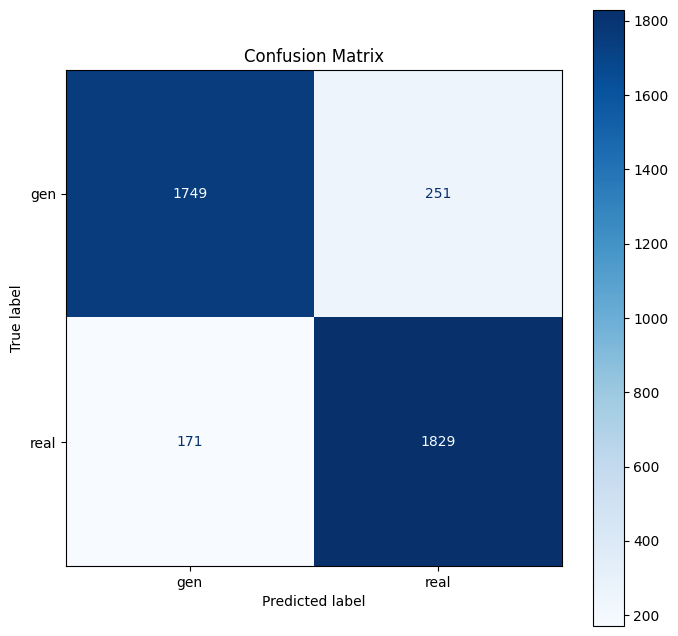

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/drive/MyDrive/1_Research/Models/my_model_4.h5')

test_generator.reset()

predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")

# True classes from the generator
true_classes = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
accuracy = np.trace(cm) / np.sum(cm)
print(f"Overall Accuracy: {accuracy:.2f}")

Overall Accuracy: 0.89


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
specificity = recall_score(1 - true_classes, 1 - predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.89
Precision: 0.88
Recall: 0.91
Specificity: 0.87
F1 Score: 0.90


125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 271ms/step


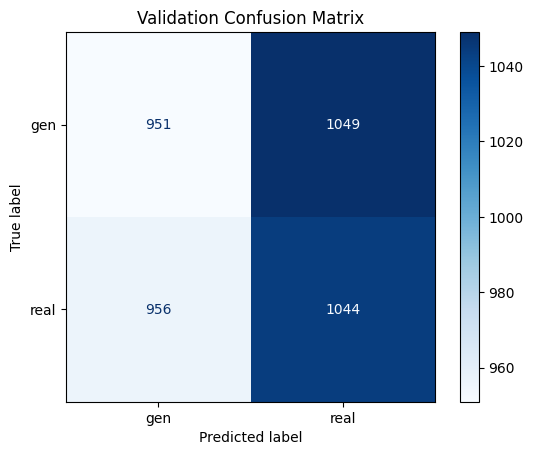

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_generator.reset()
val_predictions = model.predict(val_generator)
val_predictions_classes = (val_predictions > 0.5).astype("int32")

# Get the true classes from the validation set
val_true_classes = val_generator.classes

# Generate the confusion matrix
val_cm = confusion_matrix(val_true_classes, val_predictions_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=val_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Validation Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


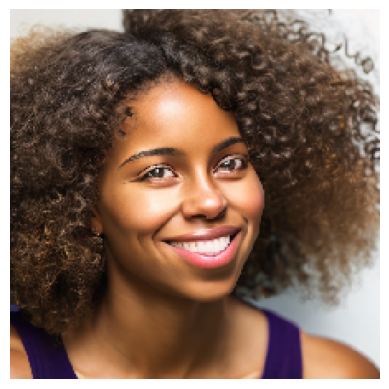

The model predicts this image is 'real' with a confidence of 48.24%.
The model predicts this image is 'fake' with a confidence of 51.76%.


In [ ]:

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def imgPreprocess(img_path, target_size):

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    return img, img_array

img_path = '/content/drive/MyDrive/img (974).png'
target_size = (224, 224)

img, img_array = imgPreprocess(img_path, target_size)

prediction = model.predict(img_array)

real_confidence = prediction[0][0] * 100
fake_confidence = (1 - prediction[0][0]) * 100

plt.imshow(img)
plt.axis('off')
plt.show()

print(f"The model predicts this image is 'real' with a confidence of {real_confidence:.2f}%.")
print(f"The model predicts this image is 'fake' with a confidence of {fake_confidence:.2f}%.")